# **Planejamento de Experimentos**
## **Produção Cupcakces**





## Importando Bibliotecas

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib.cm as cm

import seaborn as sns
sns.set_palette('terrain') # Paleta de cores
sns.set_style('darkgrid') # Estilo 


!pip install pyDOE2

import pyDOE2 as doe

import warnings
warnings.filterwarnings('ignore')

from  scipy import stats

import statsmodels.api as sm

import statsmodels.formula.api as smf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Construindo um Planejamento Fatorial

In [2]:
ensaios  = doe.ff2n(2)
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [3]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha','Chocolate'])
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [4]:
experimento['Porcoes'] = [19,37,24,49]
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


## Analisando Gráficamente o Experimento

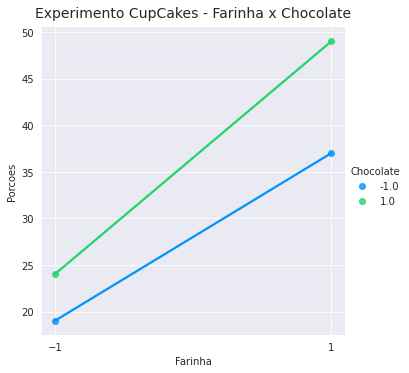

In [5]:
ax = sns.lmplot(data = experimento, 
                x = 'Farinha',
                y = 'Porcoes', 
                hue = 'Chocolate',
                ci = None
                )
ax.set(xticks = [-1,1])

plt.title('Experimento CupCakes - Farinha x Chocolate', 
          fontsize=14,
          pad =10
          )

plt.show()

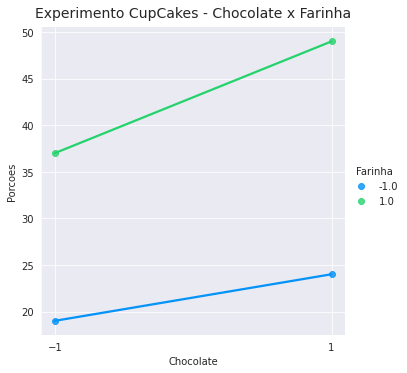

In [6]:
ax = sns.lmplot(data = experimento, 
                x = 'Chocolate',
                y = 'Porcoes', 
                hue = 'Farinha',
                ci = None
                )
ax.set(xticks = [-1,1])

plt.title('Experimento CupCakes - Chocolate x Farinha', 
          fontsize=14,
          pad =10
          )

plt.show()

## Stats Model



In [7]:
modelo = smf.ols(data = experimento, 
                 formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [8]:
modelo_ajustado = modelo.fit()

###  OLS Regression Results      

In [9]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                nan
Time:                        17:28:50   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


### Aumentando os Graus de Liberdade

In [10]:
centro  = np.array([[0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30]
                    ])

In [11]:
df_centro = pd.DataFrame(centro, 
                         columns = ['Farinha','Chocolate','Porcoes'], 
                         index = [4,5,6,7]
                         )

In [12]:
experimento = experimento.append(df_centro)
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


## Análise de Significancia Estatistica

In [13]:
modelo = smf.ols(data = experimento, 
                 formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [14]:
modelo_ajustado = modelo.fit()

In [15]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Wed, 17 Aug 2022   Prob (F-statistic):            0.00152
Time:                        17:28:51   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

##  Teste de significância estatística usando o **t**

In [16]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [17]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [18]:
distribuicao = stats.t(df=4) # Utilizando 4 graus de liberdade

In [19]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [20]:
limite = [distribuicao.ppf(q = 1 - 0.025)]*len(nome)
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

## Plotando Gráfico

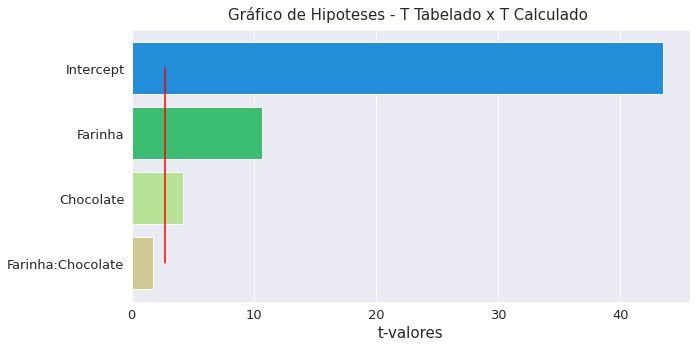

In [21]:
ax = sns.barplot(x = t_valores, y = nome)

ax.figure.set_size_inches(10,5)

ax.tick_params(labelsize = 13)

ax.set_xlabel('t-valores',
              fontsize = 15)

ax.plot(limite, nome, 'red')

ax.set_title('Gráfico de Hipoteses - T Tabelado x T Calculado ',
             fontsize=15,
             pad = 10 )

plt.show()

### Observação 



> Os ingredientes: Farinha e Chocolate, têm influência na quantidade de cupcakces produzido.<p>
No entanto, a interação da Farinha com o Chocolate  não possui influência significante na quantidade de cupcakes.<p> Por isso, iremos realizar mudança no modelo.

## Propondo um Novo Modelo 

In [22]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [23]:
modelo_ajustado_2 = modelo_2.fit()

In [24]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           0.000571
Time:                        17:28:51   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

## Preditos por Observados

In [25]:
observados = experimento['Porcoes']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [26]:
preditos = modelo_ajustado_2.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [27]:
np.linspace(start = 15, stop = 50, num = 10)

array([15.        , 18.88888889, 22.77777778, 26.66666667, 30.55555556,
       34.44444444, 38.33333333, 42.22222222, 46.11111111, 50.        ])

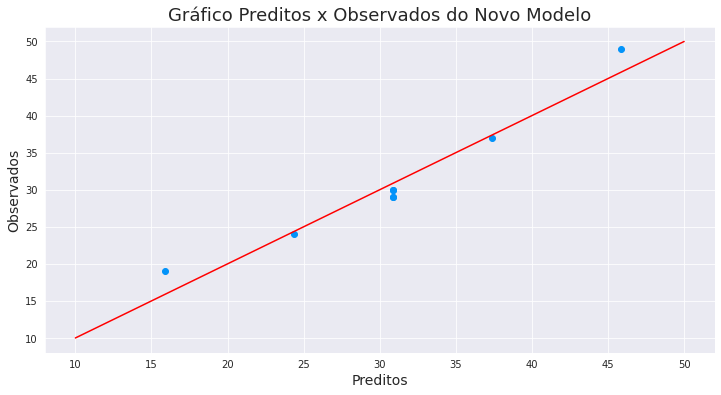

In [28]:
plt.figure(figsize = (12,6))

plt.xlabel('Preditos', fontsize=14)
plt.ylabel('Observados', fontsize=14)

# Linha de Guia

x = np.linspace(start = 10, stop = 50, num = 10)
y = np.linspace(start = 10, stop = 50, num = 10)

plt.plot(x, y, 'red')

plt.scatter(preditos, observados)

plt.title('Gráfico Preditos x Observados do Novo Modelo',fontsize=18)

plt.show()

## Explorando o Modelo

In [29]:
parametros = modelo_ajustado_2.params
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

In [30]:
def modelo_receita(x_f, x_c):
    
    # Limites
    
    limite_normalizado = [-1,1]
    
    limite_farinha = [0.5,1.5]
    
    limite_chocolate = [0.1,0.5]
    
    # Converter
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
    
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido

    return round(porcoes)

In [31]:
modelo_receita(0.5,0.1)

16

# Mapa de Cores

In [32]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)

x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)


In [33]:
pontos = []

for cont1 in x_farinha:
    temp =[]

    for cont2 in x_chocolate:
          temp.append(modelo_receita(cont1, cont2))
      
    pontos.append(temp)


In [34]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

## Gráfico Mapa de Cor

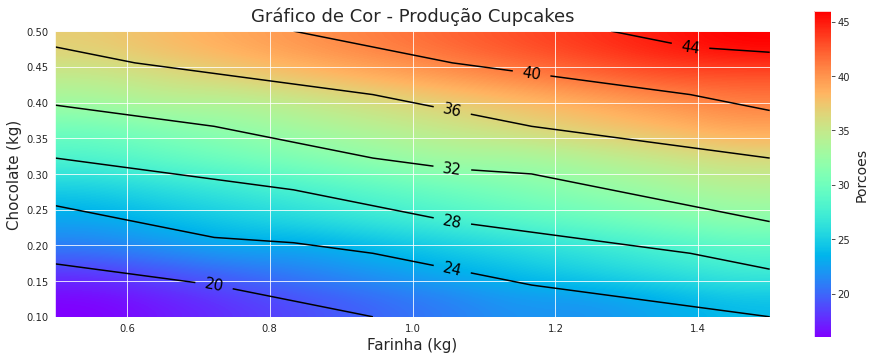

In [35]:
# Base

plt.figure(figsize=(16,6))

plt.xlabel('Farinha (kg)', fontsize = 15)
plt.ylabel('Chocolate (kg)', fontsize = 15)

# Mapa de Cor

mapa_cor = plt.imshow( pontos, 
                      origin = 'slower',
                      cmap = cm.rainbow, 
                      interpolation = 'quadric',
                      extent = (0.5,1.5,0.1,0.5)
                      )
# Barra de Cor 

plt.colorbar().set_label('Porcoes',fontsize=14)

# Linha

linhas = plt.contour( x_farinha,
                     x_chocolate,
                     pontos, 
                     colors = 'k', 
                     linewidths = 1.5)
plt.clabel( linhas,
            inline = True, 
            fmt = '%1.0f', 
            fontsize = 15.0, 
            inline_spacing = 10)

plt.title('Gráfico de Cor - Produção Cupcakes',
          fontsize = 18,
          pad = 10)

plt.show()


# Simulador - Produção de Cupcakes


> Este é um simulador para produção de cupcakes.<p> Informe a quantidade de Farinha (entre 0.5 e 1.5 kg) e de Chocolate (entre 0.1 e 0.5 kg) para saber quantos cupcakes serão produzidos.<p>



In [6]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display


# Criando os controles do formulário
farinha = widgets.Text(description="Farinha")
chocolate = widgets.Text(description="Chocolate")

botao = widgets.Button(description = "Simular Produção")

# Posicionando os Controles

left = VBox([farinha])
right = VBox([chocolate])
inputs = HBox([left, right])

# Função do simulador 

def simulador(sender):
      entrada = [[
          float(farinha.value if farinha.value else 0),
          float(chocolate.value if chocolate.value else 0)
            ]]

  # print(entrada)
      print('Total de {0} Cupcakces'.format(modelo_receita(entrada[0][0],
                                                       entrada[0][1])))

botao.on_click(simulador)

In [7]:
display(inputs,botao)

Button(description='Simular Produção', style=ButtonStyle())